In [1]:
#import libraries
import pandas as pd
import numpy as np
import itertools
import networkx as nx
from scipy.cluster import hierarchy
import scipy.spatial.distance as ssd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math
pd.options.mode.chained_assignment = None 
sns.set(font='Times New Roman')
sns.set(font_scale=1.5)
import matplotlib.pyplot 
import Bio
#Neighbour Join Tree
import pandas as pd
from Bio.Phylo.TreeConstruction import DistanceMatrix, DistanceTreeConstructor
import matplotlib.pyplot as plt
import Bio.Phylo as Phylo
import os
import Bio.Phylo as Phylo
import warnings
import math 

In [2]:
strains_pyro = pd.read_csv('strains.tsv', delimiter='\t')
strains_pyro.head()

,rank,strain,mean/stddev,log10(P(R > R_A)),R / R_A,R / R_A 95% ci lower,R / R_A 95% ci upper,confirmed cases / day,confirmed cases total,birthday,mutations
0,1,BL.1,525.060,59868.0,24.9379,24.6432,25.2362,2330.2800,1841930.0,none,"E:T9I,M:A63T,M:D3N,M:Q19E,N:E136D,N:G204R,N:P1..."
1,2,BA.2.75.4,647.092,90928.9,24.1511,23.9215,24.3828,195.5260,360796.0,2022-07-01,"E:T9I,M:A63T,M:Q19E,N:G204R,N:G243S,N:P13L,N:R..."
2,3,BA.5.2.6,518.408,58360.7,24.0501,23.7654,24.3382,1177.6300,347283.0,2022-06-07,"E:T9I,M:A63T,M:Q19E,N:G204R,N:P13L,N:R203K,N:S..."
3,4,BN.1,688.430,102917.0,23.9622,23.7486,24.1778,53.8244,244894.0,none,"E:T9I,M:A63T,M:D3N,M:Q19E,N:G204R,N:P13L,N:R20..."
4,5,BF.7,304.305,20111.1,23.8255,23.3486,24.3122,134552.0000,8264330.0,2022-06-02,"E:T9I,M:A63T,M:D3N,M:Q19E,N:G204R,N:P13L,N:R20..."


In [3]:
strains_pyro = strains_pyro[['strain', 'R / R_A']]
strains_pyro.head()

,strain,R / R_A
0,BL.1,24.9379
1,BA.2.75.4,24.1511
2,BA.5.2.6,24.0501
3,BN.1,23.9622
4,BF.7,23.8255


In [4]:
'''
Alpha = B.1.1.7
Beta = B.1.351
Delta = B.1.617.2, AY.x
Omicron = BA*
'''

# Define a regular expression pattern to match 'AY' or 'BA' at the start
# pattern = r'^(AY|BA)|^(B\.1\.1\.7|B\.1\.351|B\.1\.617\.2)'
pattern = r'^(AY|BA)|^(B\.1\.1\.7|B\.1\.351|B\.1\.617\.2)$'

# Use the .str.match() method with the regular expression
selected_rows = strains_pyro[strains_pyro['strain'].str.match(pattern)]

# Display the selected rows
print(selected_rows.tail())

# # Assuming you have already selected the rows as mentioned in your code
# selected_rows_list = [row.tolist() for _, row in selected_rows.iterrows()]

# # Display the selected rows as a list of lists
# for row in selected_rows_list:
#     print(row)



      strain  R / R_A
604    AY.30  2.15041
605    AY.40  2.15017
606    AY.31  2.13024
675  B.1.1.7  1.63187
691  B.1.351  1.52862


In [5]:
# Define a mapping of values to replace
replacement_dict = {
    'B.1.1.7': 'Alpha',
    'B.1.351': 'Beta',
    'B.1.617.2': 'Delta',
}

# Loop through each row in the 'strain' column and replace based on conditions
for index, row in selected_rows.iterrows():
    if row['strain'].startswith('AY'):
        selected_rows.at[index, 'strain'] = 'Delta'
    elif row['strain'].startswith('BA'):
        selected_rows.at[index, 'strain'] = 'Omicron'
# Replace values in the 'strain' column based on the mapping
selected_rows['strain'] = selected_rows['strain'].replace(replacement_dict)

# Display the updated DataFrame
print(selected_rows)

      strain   R / R_A
1    Omicron  24.15110
2    Omicron  24.05010
5    Omicron  22.95050
6    Omicron  22.19230
9    Omicron  21.38810
..       ...       ...
604    Delta   2.15041
605    Delta   2.15017
606    Delta   2.13024
675    Alpha   1.63187
691     Beta   1.52862

[502 rows x 2 columns]


In [6]:
selected_rows['strain'].unique()

array(['Omicron', 'Delta', 'Alpha', 'Beta'], dtype=object)

In [7]:
# Group by the 'strain' column and calculate the mean for each group
grouped_df_pyro = selected_rows.groupby('strain')['R / R_A'].mean().reset_index()

# Display the grouped DataFrame
print(grouped_df_pyro)

    strain    R / R_A
0    Alpha   1.631870
1     Beta   1.528620
2    Delta   2.626549
3  Omicron  12.560946


In [8]:
fitness_dpgr = pd.read_csv('/scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/USA_continent_combined_diference_matrix_for_who_labels.csv')
fitness_dpgr

,Alpha,Beta,Delta,Omicron
0,0.000000,-0.002825,-0.024760,-0.109624
1,0.002825,0.000000,-0.021935,-0.106799
2,0.024760,0.021935,0.000000,-0.084864
3,0.109624,0.106799,0.084864,0.000000


In [9]:
fitness_dpgr.shape, fitness_dpgr.columns

((4, 4), Index(['Alpha', 'Beta', 'Delta', 'Omicron'], dtype='object'))

In [10]:
fitness_dpgr = fitness_dpgr['Alpha']
fitness_dpgr

0    0.000000
1    0.002825
2    0.024760
3    0.109624
Name: Alpha, dtype: float64

In [11]:
series = pd.Series(fitness_dpgr, name='Alpha')

# Rename the column
series = series.rename('fitV / fitAlpha')

# Display the Series with the updated column name
print(series)

0    0.000000
1    0.002825
2    0.024760
3    0.109624
Name: fitV / fitAlpha, dtype: float64


In [12]:
# Merge the two DataFrames using pd.concat()
merged_df = pd.concat([grouped_df_pyro, series], axis=1)

# Display the merged DataFrame
print(merged_df)


    strain    R / R_A  fitV / fitAlpha
0    Alpha   1.631870         0.000000
1     Beta   1.528620         0.002825
2    Delta   2.626549         0.024760
3  Omicron  12.560946         0.109624


In [13]:
# # Create a scatter plot with a linear trendline
# sns.lmplot(x='R / R_A', y='fitV / fitAlpha', data=merged_df, ci=None)

# # Customize plot labels and title
# plt.xlabel('R / R_A')
# plt.ylabel('fitV / fitAlpha')
# plt.title('Scatter Plot with Linear Trendline')

# # Show the plot
# plt.show()

In [14]:
# # Extract x and y values from the DataFrame
# x_values = merged_df['R / R_A']
# y_values = merged_df['fitV / fitAlpha']

# # Fit a linear trendline (polynomial degree 1)
# coefficients = np.polyfit(x_values, y_values, 1)
# poly = np.poly1d(coefficients)
# trendline_x = np.linspace(min(x_values), max(x_values), 100)
# trendline_y = poly(trendline_x)

# # Create a scatter plot
# plt.scatter(x_values, y_values, label='Data Points')

# # Add the trendline
# plt.plot(trendline_x, trendline_y, label='Trendline', color='red')

# # Customize plot labels and legend
# plt.xlabel('R / R_A(PyRo)')
# plt.ylabel('fit_Variant / fit_Alpha(DPGR)')
# plt.legend()

# # Annotate data points with labels
# for i, label in enumerate(merged_df['strain']):
#     plt.annotate(label, (x_values[i], y_values[i]), textcoords="offset points", xytext=(0,10), ha='center')

# # Show the plot
# plt.title('Scatter Plot with Linear Trendline')
# plt.show()

In [15]:
# # Extract x and y values from the DataFrame
# x_values = merged_df['R / R_A']
# y_values = merged_df['fitV / fitAlpha']

# # Define colors for each data point
# colors = {'Alpha': 'red', 'Beta': 'green', 'Delta': 'blue', 'Omicron': 'purple'}

# # Fit a linear trendline (polynomial degree 1)
# coefficients = np.polyfit(x_values, y_values, 1)
# poly = np.poly1d(coefficients)
# trendline_x = np.linspace(min(x_values), max(x_values), 100)
# trendline_y = poly(trendline_x)

# # Create a scatter plot with different colors and labels
# for i, label in enumerate(merged_df['strain']):
#     plt.scatter(x_values.iloc[i], y_values.iloc[i], label=label, color=colors[label], s=100)

# # Add the trendline
# plt.plot(trendline_x, trendline_y, label='Trendline', color='red')

# # Customize plot labels and legend
# plt.xlabel('R / R_A')
# plt.ylabel('fitV / fitAlpha')
# plt.legend()

# # Show the plot
# plt.title('Scatter Plot with Linear Trendline and Labels')
# plt.show()

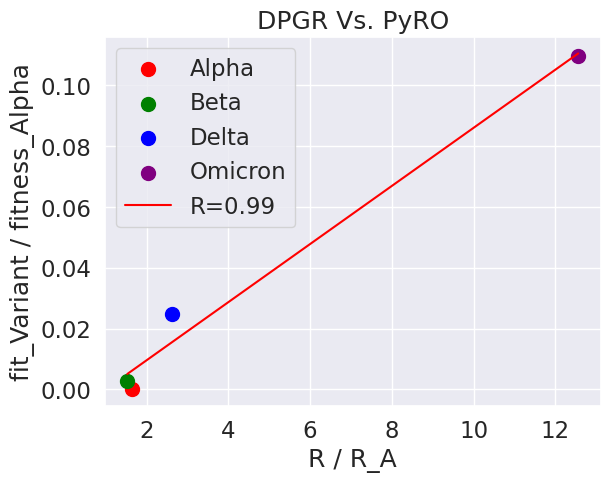

In [16]:
# Extract x and y values from the DataFrame
x_values = merged_df['R / R_A']
y_values = merged_df['fitV / fitAlpha']

# # Define colors for each data point
colors = {'Alpha': 'red', 'Beta': 'green', 'Delta': 'blue', 'Omicron': 'purple'}

# Fit a linear trendline (polynomial degree 1)
coefficients = np.polyfit(x_values, y_values, 1)
poly = np.poly1d(coefficients)
trendline_x = np.linspace(min(x_values), max(x_values), 100)
trendline_y = poly(trendline_x)

# Calculate the Pearson correlation coefficient for the entire dataset
pearson_r = np.corrcoef(x_values, y_values)[0, 1]

# Create a scatter plot with different colors and labels including Pearson R value
for i, label in enumerate(merged_df['strain']):
    plt.scatter(x_values.iloc[i], y_values.iloc[i], label=f'{label}', color=colors[label], s=100)

# Add the trendline
plt.plot(trendline_x, trendline_y, label=f'R={pearson_r:.2f}', color='red')

# Customize plot labels and legend
plt.xlabel('R / R_A')
plt.ylabel('fit_Variant / fitness_Alpha')
plt.legend()

# Show the plot
plt.title('DPGR Vs. PyRO')
plt.show()

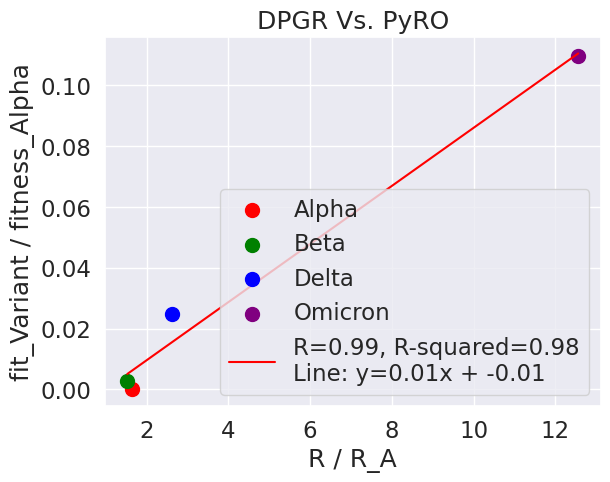

In [17]:
# Extract x and y values from the DataFrame
x_values = merged_df['R / R_A']
y_values = merged_df['fitV / fitAlpha']

# Fit a linear trendline (polynomial degree 1)
coefficients = np.polyfit(x_values, y_values, 1)
poly = np.poly1d(coefficients)
trendline_x = np.linspace(min(x_values), max(x_values), 100)
trendline_y = poly(trendline_x)

# Calculate the Pearson correlation coefficient for the entire dataset
pearson_r = np.corrcoef(x_values, y_values)[0, 1]

# Calculate R-squared
residuals = y_values - poly(x_values)
ss_residuals = np.sum(residuals**2)
ss_total = np.sum((y_values - np.mean(y_values))**2)
r_squared = 1 - (ss_residuals / ss_total)

# Create a scatter plot with different colors and labels including Pearson R and R-squared values
for i, label in enumerate(merged_df['strain']):
    plt.scatter(x_values.iloc[i], y_values.iloc[i], label=f'{label}', color=colors[label], s=100)

# Add the trendline and labels
plt.plot(trendline_x, trendline_y, label=f'R={pearson_r:.2f}, R-squared={r_squared:.2f}\nLine: y={coefficients[0]:.2f}x + {coefficients[1]:.2f}', color='red')

# Customize plot labels and legend
plt.xlabel('R / R_A')
plt.ylabel('fit_Variant / fitness_Alpha')
plt.legend()

# Show the plot
plt.title('DPGR Vs. PyRO')
plt.show()

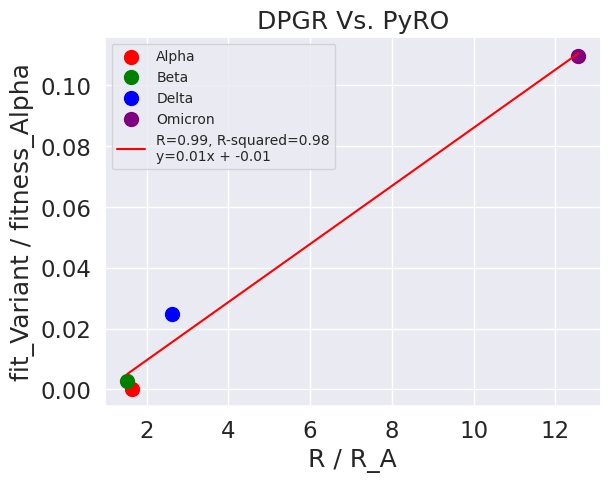

In [18]:
# Extract x and y values from the DataFrame
x_values = merged_df['R / R_A']
y_values = merged_df['fitV / fitAlpha']

# Fit a linear trendline (polynomial degree 1)
coefficients = np.polyfit(x_values, y_values, 1)
poly = np.poly1d(coefficients)
trendline_x = np.linspace(min(x_values), max(x_values), 100)
trendline_y = poly(trendline_x)

# Calculate the Pearson correlation coefficient for the entire dataset
pearson_r = np.corrcoef(x_values, y_values)[0, 1]

# Calculate R-squared
residuals = y_values - poly(x_values)
ss_residuals = np.sum(residuals**2)
ss_total = np.sum((y_values - np.mean(y_values))**2)
r_squared = 1 - (ss_residuals / ss_total)

# Create a scatter plot with different colors and labels including Pearson R and R-squared values
for i, label in enumerate(merged_df['strain']):
    plt.scatter(x_values.iloc[i], y_values.iloc[i], label=f'{label}', color=colors[label], s=100)

# Add the trendline and labels
plt.plot(trendline_x, trendline_y, label=f'R={pearson_r:.2f}, R-squared={r_squared:.2f}\ny={coefficients[0]:.2f}x + {coefficients[1]:.2f}', color='red')

# Customize plot labels and legend
plt.xlabel('R / R_A')
plt.ylabel('fit_Variant / fitness_Alpha')

# Move the legend to the top left and make it smaller
plt.legend(loc='upper left', bbox_to_anchor=(0.0, 1), fontsize=10)

# Show the plot
plt.title('DPGR Vs. PyRO')
plt.show()

## Log transformed Pyro

In [19]:
merged_df_log = merged_df.copy()
merged_df_log

,strain,R / R_A,fitV / fitAlpha
0,Alpha,1.631870,0.000000
1,Beta,1.528620,0.002825
2,Delta,2.626549,0.024760
3,Omicron,12.560946,0.109624


In [20]:
# Calculate log2 of 'R / R_A' and update the column
merged_df_log['log2(R / R_A)'] = np.log2(merged_df_log['R / R_A'])
# Drop the original 'R / R_A' column
merged_df_log.drop(columns=['R / R_A'], inplace=True)
merged_df_log

,strain,fitV / fitAlpha,log2(R / R_A)
0,Alpha,0.000000,0.706526
1,Beta,0.002825,0.612230
2,Delta,0.024760,1.393169
3,Omicron,0.109624,3.650873


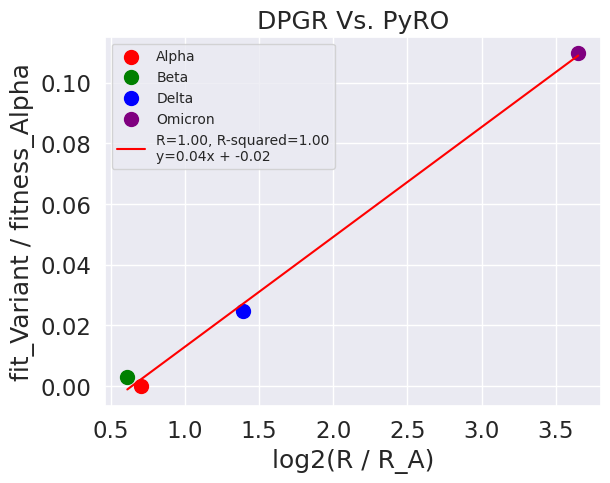

In [31]:
# Extract x and y values from the DataFrame
x_values = merged_df_log['log2(R / R_A)']
y_values = merged_df_log['fitV / fitAlpha']

# Fit a linear trendline (polynomial degree 1)
coefficients = np.polyfit(x_values, y_values, 1)
poly = np.poly1d(coefficients)
trendline_x = np.linspace(min(x_values), max(x_values), 100)
trendline_y = poly(trendline_x)

# Calculate the Pearson correlation coefficient for the entire dataset
pearson_r = np.corrcoef(x_values, y_values)[0, 1]

# Calculate R-squared
residuals = y_values - poly(x_values)
ss_residuals = np.sum(residuals**2)
ss_total = np.sum((y_values - np.mean(y_values))**2)
r_squared = 1 - (ss_residuals / ss_total)

#set the fig size 
# plt.figure(figsize=(5, 4))

# Create a scatter plot with different colors and labels including Pearson R and R-squared values
for i, label in enumerate(merged_df_log['strain']):
    plt.scatter(x_values.iloc[i], y_values.iloc[i], label=f'{label}', color=colors[label], s=100)

# Add the trendline and labels
plt.plot(trendline_x, trendline_y, label=f'R={pearson_r:.2f}, R-squared={r_squared:.2f}\ny={coefficients[0]:.2f}x + {coefficients[1]:.2f}', color='red')

# Customize plot labels and legend
plt.xlabel('log2(R / R_A)')
plt.ylabel('fit_Variant / fitness_Alpha')

# Move the legend to the top left and make it smaller
plt.legend(loc='upper left', bbox_to_anchor=(0.0, 1), fontsize=10)

# Show the plot
plt.title('DPGR Vs. PyRO')

# file_name = "PYRO_vs_DPGR_comparison.png"
directory = "/scr/mjpantho/Pantho_differential_fitness/PYRO_Vs_DPGR/"

# Create the directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Save the figure to the specified directory with DPI set to 300
filename = os.path.join(directory, "PYRO_vs_DPGR_fitness_comparison.png")
plt.savefig(filename, dpi=300, bbox_inches="tight")

plt.show()

 ## Comparison of Fitness and Kd (Binding affinity)

In [22]:
import pandas as pd

data_fitness_kd = {
    'strain': ['Alpha', 'Beta', 'Delta', 'Omicron'],
    'R / R_A': [1.631870, 1.528620, 2.626549, 12.560946],
    'fitV / fitAlpha': [0.000000, 0.002825, 0.024760, 0.109624]
}

df = pd.DataFrame(data_fitness_kd)

# the Kd values for each variant
kd_values = {
    'Alpha': 6.7,
    'Beta': 19.7,
    'Delta': 25.1,
    'Omicron': 22.1
}

# Add a new 'Kd' column based on the strain values
df['Kd'] = df['strain'].map(kd_values)

# Print the updated DataFrame
print(df)


    strain    R / R_A  fitV / fitAlpha    Kd
0    Alpha   1.631870         0.000000   6.7
1     Beta   1.528620         0.002825  19.7
2    Delta   2.626549         0.024760  25.1
3  Omicron  12.560946         0.109624  22.1


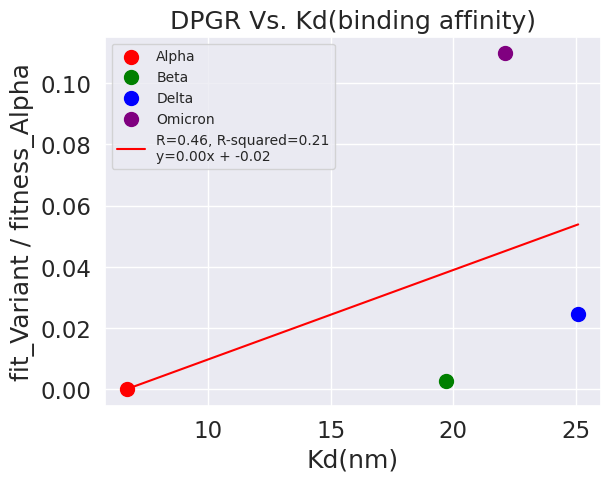

In [30]:
# Extract x and y values from the DataFrame
x_values =  df['Kd']
y_values = df['fitV / fitAlpha']

# Fit a linear trendline (polynomial degree 1)
coefficients = np.polyfit(x_values, y_values, 1)
poly = np.poly1d(coefficients)
trendline_x = np.linspace(min(x_values), max(x_values), 100)
trendline_y = poly(trendline_x)

# Calculate the Pearson correlation coefficient for the entire dataset
pearson_r = np.corrcoef(x_values, y_values)[0, 1]

# Calculate R-squared
residuals = y_values - poly(x_values)
ss_residuals = np.sum(residuals**2)
ss_total = np.sum((y_values - np.mean(y_values))**2)
r_squared = 1 - (ss_residuals / ss_total)

#set the fig size 
# plt.figure(figsize=(5, 4))  # Set figure size to 3 by 3

# Create a scatter plot with different colors and labels including Pearson R and R-squared values
for i, label in enumerate(df['strain']):
    plt.scatter(x_values.iloc[i], y_values.iloc[i], label=f'{label}', color=colors[label], s=100)

# Add the trendline and labels
plt.plot(trendline_x, trendline_y, label=f'R={pearson_r:.2f}, R-squared={r_squared:.2f}\ny={coefficients[0]:.2f}x + {coefficients[1]:.2f}', color='red')

# Customize plot labels and legend
plt.xlabel("Kd(nm)")
plt.ylabel('fit_Variant / fitness_Alpha')

# Move the legend to the top left and make it smaller
plt.legend(loc='upper left', bbox_to_anchor=(0.0, 1), fontsize=10)

# Show the plot
plt.title('DPGR Vs. Kd(binding affinity)')

# file_name = "PYRO_vs_DPGR_comparison.png"
directory = "/scr/mjpantho/Pantho_differential_fitness/PYRO_Vs_DPGR/"

# Create the directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Save the figure to the specified directory with DPI set to 300
filename = os.path.join(directory, "PYRO_vs_DPGR_binding_affinity.png")
plt.savefig(filename, dpi=300, bbox_inches="tight")

plt.show()

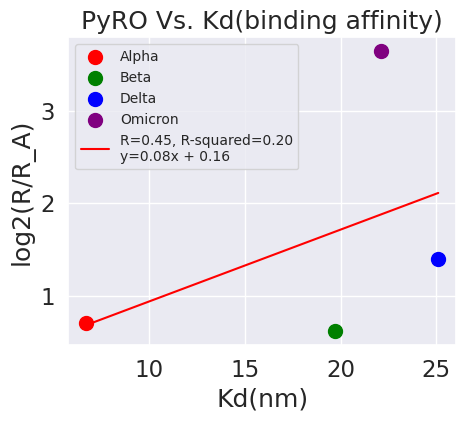

In [29]:
# Extract x and y values from the DataFrame
x_values =  df['Kd']
y_values = np.log2(df['R / R_A'])

# Fit a linear trendline (polynomial degree 1)
coefficients = np.polyfit(x_values, y_values, 1)
poly = np.poly1d(coefficients)
trendline_x = np.linspace(min(x_values), max(x_values), 100)
trendline_y = poly(trendline_x)

# Calculate the Pearson correlation coefficient for the entire dataset
pearson_r = np.corrcoef(x_values, y_values)[0, 1]

# Calculate R-squared
residuals = y_values - poly(x_values)
ss_residuals = np.sum(residuals**2)
ss_total = np.sum((y_values - np.mean(y_values))**2)
r_squared = 1 - (ss_residuals / ss_total)

#set the fig size 
plt.figure(figsize=(5, 4))  # Set figure size to 3 by 3

# Create a scatter plot with different colors and labels including Pearson R and R-squared values
for i, label in enumerate(df['strain']):
    plt.scatter(x_values.iloc[i], y_values.iloc[i], label=f'{label}', color=colors[label], s=100)

# Add the trendline and labels
plt.plot(trendline_x, trendline_y, label=f'R={pearson_r:.2f}, R-squared={r_squared:.2f}\ny={coefficients[0]:.2f}x + {coefficients[1]:.2f}', color='red')

# Customize plot labels and legend
plt.xlabel("Kd(nm)")
plt.ylabel('log2(R/R_A)')

# Move the legend to the top left and make it smaller
plt.legend(loc='upper left', bbox_to_anchor=(0.0, 1), fontsize=10)

# Show the plot
plt.title('PyRO Vs. Kd(binding affinity)')

# file_name = "PYRO_vs_DPGR_comparison.png"
directory = "/scr/mjpantho/Pantho_differential_fitness/PYRO_Vs_DPGR/"

# Create the directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Save the figure to the specified directory with DPI set to 300
filename = os.path.join(directory, "PYRO_vs_DPGR_comparison.png")
plt.savefig(filename, dpi=300, bbox_inches="tight")

plt.show()